In [1]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# classify 과정에서 필요한 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer


# warning 무시하도록
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기
# csv 파일 읽기
df=pd.read_csv('C:\\GitHub\SongKim\Iris.csv') 

# Exploratory Data Analysis

**데이터 파일 살펴보기** 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**시각화하기**

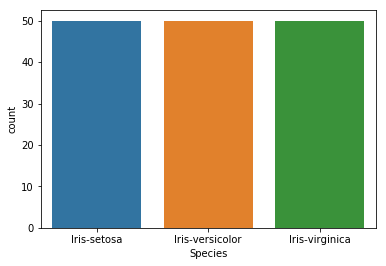

In [7]:
# bar plot 그리기
# 각각 iris species의 비율을 나타낸다.

sns.countplot('Species',data=df)
plt.show()

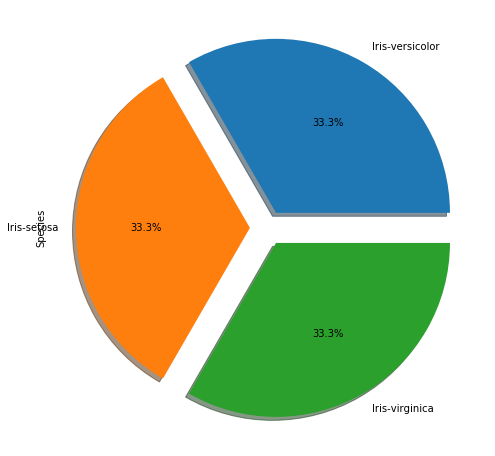

In [8]:
# pie chart 그리기
# 각각 iris species의 비율을 나타낸다.
df['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

In [9]:
# 필요없는 column drop
df.drop('Id', axis=1, inplace=True)

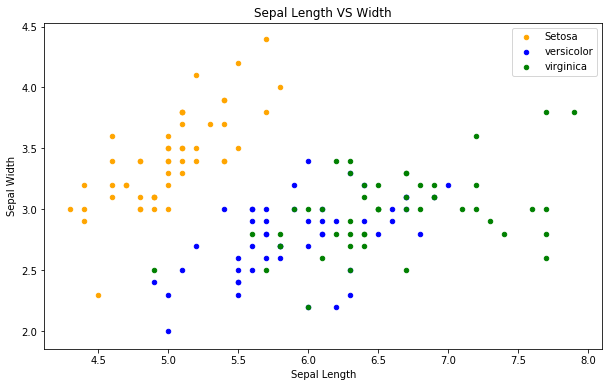

In [10]:
# Sepal scatter plot
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

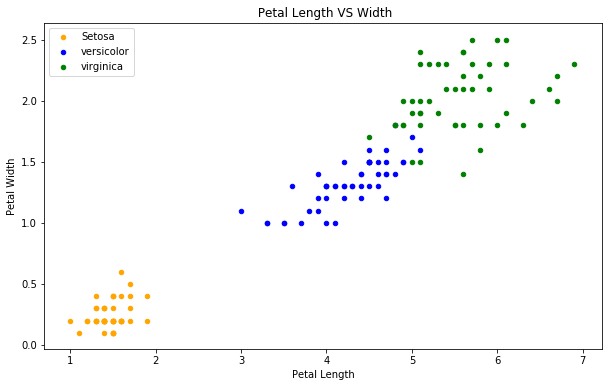

In [11]:
# Petal scatter plot
fig = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A266DAD898>,
      dtype=object)

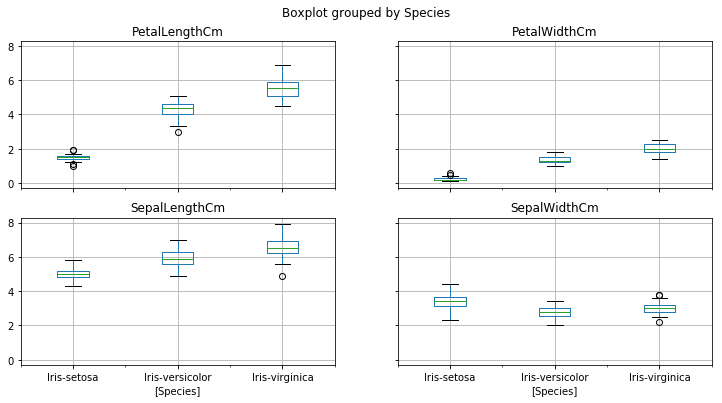

In [12]:
# Boxplot
df.boxplot(by='Species', figsize=(12,6))

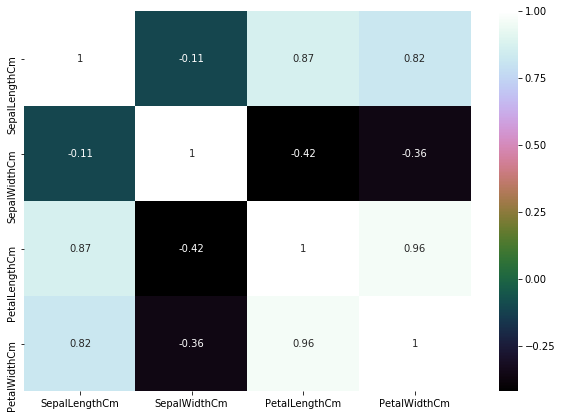

In [13]:
# Heatmap
# 변수들 간의 상관관계를 판단하기 위해 사용

fig = plt.gcf()
fig.set_size_inches(10,7)
fig = sns.heatmap(df.corr(), annot=True, cmap='cubehelix')

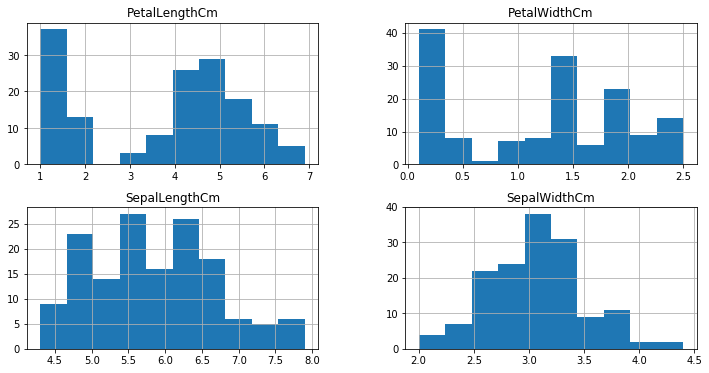

In [14]:
# Distribution plot
df.hist(linewidth=1)
fig=plt.gcf()
fig.set_size_inches(12,6)

# Classification

In [15]:
# training dataset과 testing dataset으로 나누기

train, test = train_test_split(df)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [16]:
# Feature과 target variable 나누기
# Feature: 'SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'
# Target variable: 'Species'

train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
test_y =test.Species 

In [24]:
print(type(train_X))
print(type(train_y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


**Machine Learning 모델에 적용**

1. Logistic Regression

In [17]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is:', metrics.accuracy_score(prediction, test_y))

The accuracy of the Logistic Regression is: 0.9473684210526315


2. Support Vector Machine

In [18]:
model = SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the SVM is:', metrics.accuracy_score(prediction, test_y))

The accuracy of the SVM is: 0.9473684210526315


3. Gaussian Naive Bayes

In [19]:
model = GaussianNB()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the Gaussian Naive Bayes is:', metrics.accuracy_score(prediction, test_y))

The accuracy of the Gaussian Naive Bayes is: 0.868421052631579


4. Decision Tree

In [20]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is:', metrics.accuracy_score(prediction, test_y))

The accuracy of the Decision Tree is: 0.9473684210526315


5. Random Forest

In [21]:
model = RandomForestClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the Random Forest is:', metrics.accuracy_score(prediction, test_y))

The accuracy of the Random Forest is: 0.9473684210526315


6. KNN

In [22]:
model = KNeighborsClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the KNN is:', metrics.accuracy_score(prediction, test_y))

The accuracy of the KNN is: 0.9473684210526315


# Observation

1. 위의 시각화 단계에서 보았을 때 Petal Width와 Petal Length 변수간의 상관관계가 Sepal Width와 Sepal Length 변수끼리의 상관관계보다 높았다.

2. 분류 단계에서 SVM 모델을 적용하여 도출한 결과가 정확도가 가장 높았다.